In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
data = pd.read_csv("house_price_full.csv")
data.head

<bound method NDFrame.head of      bedrooms  sqft_living    price
0           3         1340   313000
1           5         3650  2384000
2           3         1930   342000
3           3         2000   420000
4           4         1940   550000
..        ...          ...      ...
494         4         3040   647000
495         5         4530   950000
496         3         1370   185000
497         3         1940   335000
498         3         1040   210000

[499 rows x 3 columns]>

Text(0, 0.5, 'Цена дома')

<Figure size 1000x600 with 0 Axes>

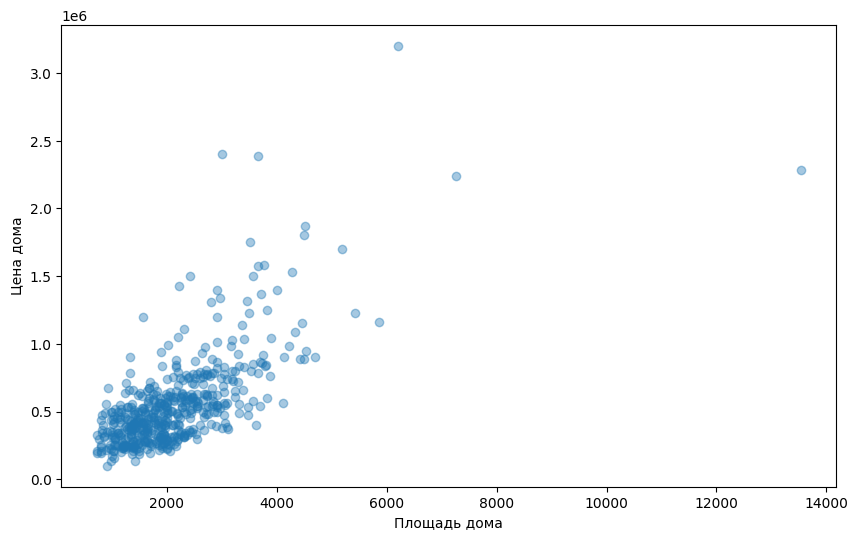

In [68]:
plt.figure(figsize=(10,6))

x = data["sqft_living"]
y = data["price"]

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.4)
plt.xlabel('Площадь дома')
plt.ylabel('Цена дома')

In [69]:
def model(a, b, x):
    return a*x + b

def loss_function(a, b, x, y):
    num = len(x)
    prediction=model(a,b,x)
    return (0.5/num) * (np.square(prediction-y)).sum()

def optimize(a,b,x,y):
    num = len(x)
    prediction = model(a,b,x)
    da = (1.0/num) * ((prediction -y)*x).sum()
    db = (1.0/num) * ((prediction -y).sum())
    a = a - Lr*da
    b = b - Lr*db
    return a, b

def iterate(a,b,x,y,times):
    for i in range(times):
        a,b = optimize(a,b,x,y)
    return a,b

[0.02202416]
[0.89839535]
[253.72170118] [12.13164568] 30547038060.8105


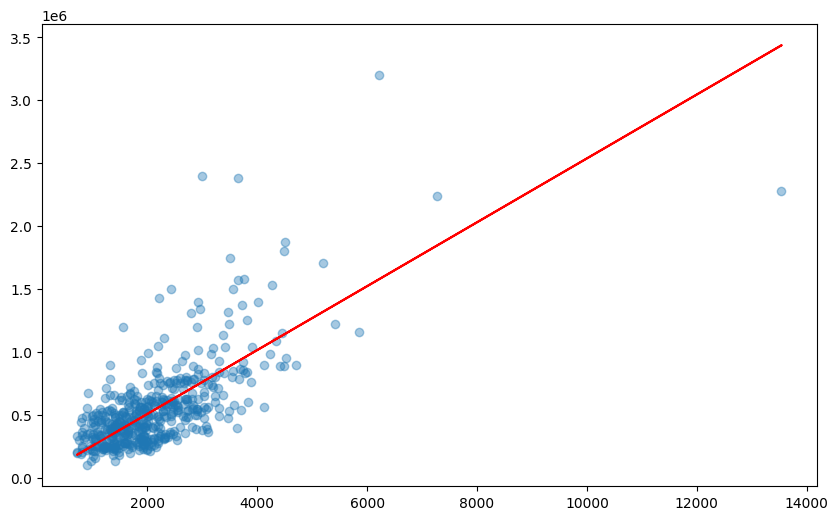

In [70]:
from turtle import color

a = np.random.rand(1)
print(a)
b = np.random.rand(1)
print(b)

Lr = 0.0000001  

a,b = iterate(a,b,x,y,10000)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.4)
plt.plot(x, prediction, color = 'red')